In [128]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import math

In [176]:
# local path the file is not relative humidity but 2m dewpoint temperature

local_path ='/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'
#gusts = xr.open_dataset('Reanalysis/gust/*.nc')

servor_path = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/fabien2/ERA5/ERA5_1990_relative_humidity.nc'

relative_humidity = xr.open_dataset(local_path)

In [177]:
relative_humidity.longitude
relative_humidity['longitude'] = relative_humidity['longitude'].where(relative_humidity['longitude'] >= 0, relative_humidity['longitude'] + 360)
relative_humidity['d2m']=relative_humidity['d2m']-273.15

In [41]:
# --> make a function
tracks_path_servor = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/WS_fabien/storms_dates.txt'
tracks_path_local = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/storms_dates.txt'

tracks = pd.read_csv(tracks_path_local, sep='\t', header=None)
#lon = tracks[5, 0:11]
#lon= np.array(tracks[5])
lon = tracks[5][1:63].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks[6][1:63].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])

In [12]:
# second storm NOT WORKING

lon = tracks[5][63:115].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks[6][63:115].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])

In [56]:
# square --> make a function

pos = arr = np.stack((lonx, latx), axis=-1)

tc_irad = np.empty((len(pos), 4))
tc_irad[:,0]=pos[:,0]-4
tc_irad[:,1]=pos[:,0]+4
tc_irad[:,2]=pos[:,1]-4
tc_irad[:,3]=pos[:,1]+4

tc_irad [tc_irad < 0] += 360

In [14]:
'''first_20.sel(longitude=slice(335,345))'''

'first_20.sel(longitude=slice(335,345))'

In [178]:
first_storm = relative_humidity.sel(time=slice('1990-01-21T03:00:00', '1990-01-28T18:00:00'))
LONE, LONW, LATN, LATS = tc_irad[0,:]
print(tc_irad)

#first_storm = first_storm.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))

[[284.910889 292.910889  37.708939  45.708939]
 [289.195404 297.195404  37.979839  45.979839]
 [293.022125 301.022125  38.648212  46.648212]
 [296.948608 304.948608  39.774544  47.774544]
 [300.610657 308.610657  41.219181  49.219181]
 [304.032532 312.032532  42.44455   50.44455 ]
 [307.525208 315.525208  43.063492  51.063492]
 [311.441956 319.441956  44.108612  52.108612]
 [315.424652 323.424652  44.939552  52.939552]
 [319.65451  327.65451   45.740711  53.740711]
 [324.385986 332.385986  46.742744  54.742744]
 [329.983643 337.983643  48.367657  56.367657]
 [334.550537 342.550537  50.163193  58.163193]
 [338.319214 346.319214  52.081779  60.081779]
 [341.381348 349.381348  53.61256   61.61256 ]
 [343.481354 351.481354  55.430359  63.430359]
 [344.955505 352.955505  56.906483  64.906483]
 [345.642426 353.642426  58.511345  66.511345]
 [345.693695 353.693695  59.578465  67.578465]
 [345.61145  353.61145   60.648735  68.648735]
 [345.085846 353.085846  61.384789  69.384789]
 [343.966858 

In [147]:
'''first_storm.sel(latitude=slice(90,0))''' # order matters !

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 361, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [138]:
n_time = len(first_storm.time)
'''minLAT = 38.657398
minLON = 301.020905
maxLAT = 62.181171
maxLON = 69.525337 

print(maxLAT, minLAT, maxLON, minLON)'''

'minLAT = 38.657398\nminLON = 301.020905\nmaxLAT = 62.181171\nmaxLON = 69.525337 \n\nprint(maxLAT, minLAT, maxLON, minLON)'

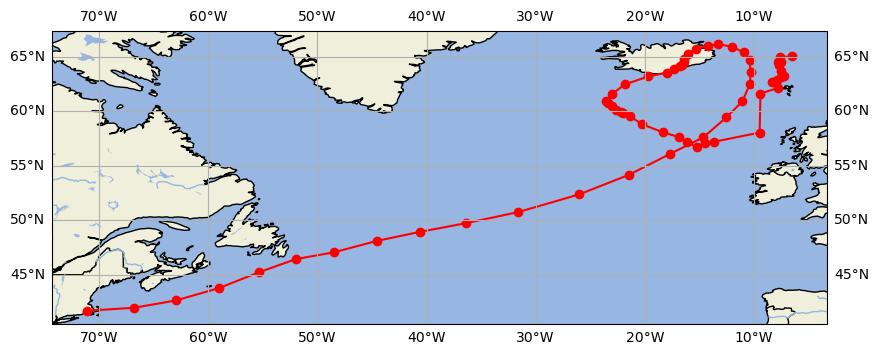

In [139]:
# show the track of the storm on the map

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# plot the longitude and latitude of the storm
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
#ax.set_extent([minLON, minLAT, maxLON, maxLAT])

ax.plot(lonx, latx, color='red', marker='o', transform=ccrs.PlateCarree())

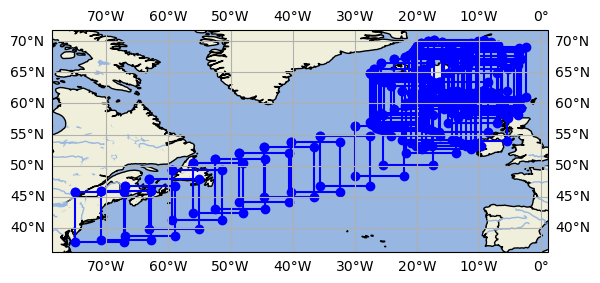

In [140]:
# plot the 62 squares around the storm and plot it on the map
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

for i in range(n_time):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
plt.show()

[284.910889, 37.708939, 357.478241, 69.018593]
284.910889 37.708939 357.478241 70.140305
[284.910889, 37.708939, 357.478241, 70.140305]


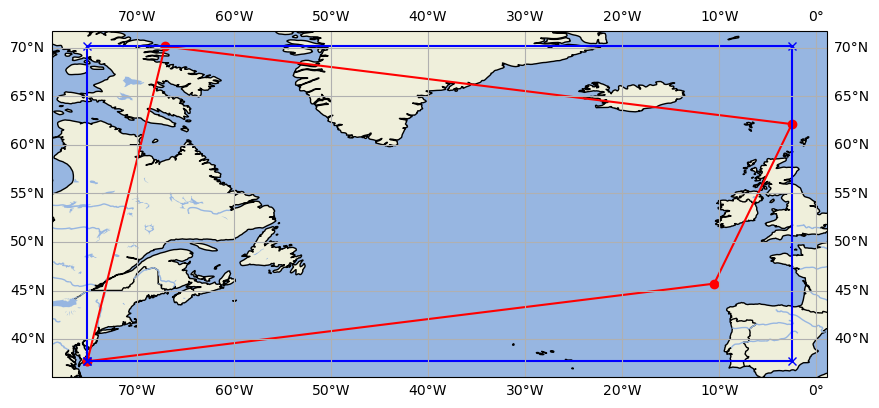

In [141]:
print([tc_irad[0,0], tc_irad[0,2], tc_irad[-1,1], tc_irad[-1,3]])
print(min(tc_irad[:,0]), min(tc_irad[:,2]), max(tc_irad[:,1]), max(tc_irad[:,3]))

# plot min and max longitudes and latitudes of the storm

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.plot([min(tc_irad[:,0]), max(tc_irad[:,0]), max(tc_irad[:,1]), min(tc_irad[:,1]), min(tc_irad[:,0])], [min(tc_irad[:,2]), min(tc_irad[:,3]), max(tc_irad[:,2]), max(tc_irad[:,3]), min(tc_irad[:,2])], color='red', marker='o', transform=ccrs.PlateCarree())
ax.plot([min(tc_irad[:,0]), max(tc_irad[:,1]), max(tc_irad[:,1]), min(tc_irad[:,0]), min(tc_irad[:,0])], [min(tc_irad[:,2]), min(tc_irad[:,2]), max(tc_irad[:,3]), max(tc_irad[:,3]), min(tc_irad[:,2])], color='blue', marker='x', transform=ccrs.PlateCarree())

# extend of this storm is the following :

print([min(tc_irad[:,0]), min(tc_irad[:,2]), max(tc_irad[:,1]), max(tc_irad[:,3])])
minLAT = min(tc_irad[:,2])
minLON = min(tc_irad[:,0])
maxLAT = max(tc_irad[:,3])
maxLON = max(tc_irad[:,1])

RminLAT = math.floor(min(tc_irad[:,2]))
RminLON = math.floor(min(tc_irad[:,0]))
RmaxLAT = math.ceil(max(tc_irad[:,3]))
RmaxLON = math.ceil(max(tc_irad[:,1]))

MovieWriter imagemagick unavailable; using Pillow instead.


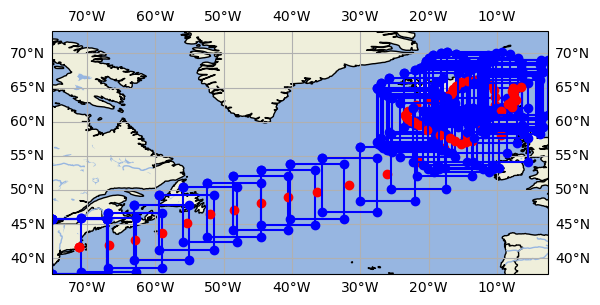

In [190]:
# make a gif of the storm and the 62 squares around it

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, maxLAT])
ax.plot()

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())
    return ax

anim = FuncAnimation(fig, animate, frames=n_time, interval=200)
anim.save('storm_01_90_2.gif', dpi=80, writer='imagemagick')


In [179]:
# slice the first_storm dataset with the min and max longitudes and latitudes of the storm

#first_storm = relative_humidity.sel(time=slice('1990-01-21T03:00:00', '1990-01-28T18:00:00'))
first_storm = first_storm.sel(latitude=slice(RmaxLAT,RminLAT), longitude=slice(RminLON,RmaxLON))
first_storm

<xarray.Dataset>
Dimensions:    (longitude: 297, latitude: 137, time: 62)
Coordinates:
  * longitude  (longitude) float32 284.0 284.2 284.5 284.8 ... 357.5 357.8 358.0
  * latitude   (latitude) float32 71.0 70.75 70.5 70.25 ... 37.5 37.25 37.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 -38.04 -39.56 ... 9.518 10.95
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

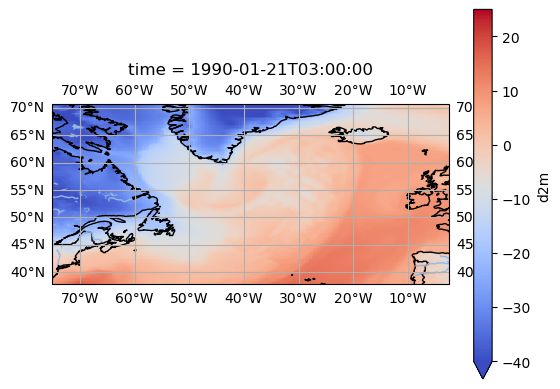

In [186]:
# plot the d2m variable at time step 0 over the limits of the storm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, RmaxLAT-4])

first_storm.d2m[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-40, vmax=25)

In [33]:
n_time = len(first_storm.time)

MovieWriter imagemagick unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x17c01c180> (for post_execute):


AttributeError: 'Colorbar' object has no attribute 'set_clim'

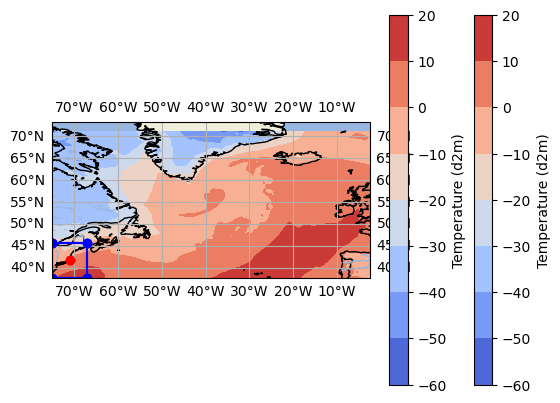

In [191]:
# plot the d2m variable for each time step over the limits of the storm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, maxLAT])
ax.plot()

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())

    plt.contourf(first_storm.longitude, first_storm.latitude, first_storm['d2m'].isel(time=i), cmap='coolwarm')

    cbar = plt.colorbar()
    cbar.set_label('Temperature (d2m)')  # Set the colorbar label
    cbar.set_clim(-40, 25)  # Set the color limits for the colorbar

    return ax

anim = FuncAnimation(fig, animate, frames=n_time, interval=200)
anim.save('storm_01_90_d2m.gif', dpi=80, writer='imagemagick')